In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('datasets/Mall_Customers.csv')

In [3]:
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
from sklearn.cluster import KMeans

In [5]:
X = df[['Age','Annual Income (k$)','Spending Score (1-100)']]

In [6]:
# random test run
model = KMeans(n_clusters=2)
model.fit(X)

KMeans(n_clusters=2)

In [7]:
# value of WCSS (within cluster sum of squares)
model.inertia_ 

212840.16982097193

In [8]:
# get all the wcss of diffrent models with diffrent value of k
wcss = [] # empty list to store interia value
for k in range(1,11): # k is number of cluster
    model = KMeans(n_clusters=k)
    model.fit(X)
    wcss.append(model.inertia_)
print("wcss",wcss)

wcss [308812.7800000001, 212840.16982097193, 143342.75157170597, 104366.151455562, 75350.77917248776, 58300.443321590676, 51116.98694463434, 44344.949801777206, 41035.856453641005, 37470.35732666378]


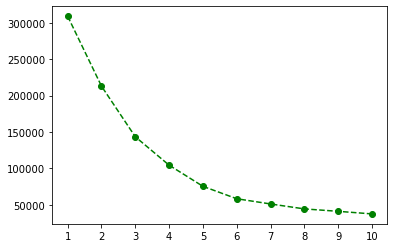

In [10]:
x = range(1,11)
y = wcss.copy()
plt.plot(x,y,'g--o')
plt.xticks(x)

plt.show()

In [19]:
# now we know 5 should be value of K, we will create the final model
K = 6
model = KMeans(n_clusters=K)
model.fit(X)

KMeans(n_clusters=6)

In [20]:
# lets do some predictions
category_pred = model.predict(X)

In [21]:
df['category'] = category_pred

In [22]:
import plotly.express as px

In [24]:
fig = px.scatter_3d(df, x='Annual Income (k$)',y='Spending Score (1-100)',z='Age',color='category',width=900,height=900)
fig.show()